In [57]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("Titanic-Dataset.csv")
age_mean = data["Age"].mean()
data.drop(["PassengerId"], axis=1, inplace=True)
data.drop(["Ticket"], axis = 1, inplace=True)
data.drop(["Name"], axis = 1, inplace=True)
data.drop(["Cabin"],axis =1 , inplace=True)
data.Sex = [1 if value == "male" else 0 for value in data.Sex]
data.Survived = [1 if value == 1 else 0 for value in data.Survived]
data.Embarked = [1 if value == "S" else 2 if value == "C" else 3 for value in data.Embarked]
data["Age"]=data["Age"].fillna(age_mean)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [58]:
#Joseph O'Rourke
y = data["Survived"]
x = data.drop(["Survived"] , axis=1)








In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled
#Joseph O'Rourke

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517, -0.57186998],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529,  0.99112436],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426, -0.57186998],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324, -0.57186998],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104,  0.99112436],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783,  2.5541187 ]])

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 30)
#Joseph O'Rourke

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

#Joseph O'Rourke

y_pred=lr.predict(x_test)
print(y_pred , y_test)
#Joseph O'Rourke

[1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 0] 417    1
307    1
87     0
577    1
684    0
      ..
150    0
800    0
645    1
824    0
17     1
Name: Survived, Length: 268, dtype: int64


In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
#Joseph O'Rourke

0.7873134328358209


In [73]:
from sklearn.pipeline import Pipeline

In [74]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",LogisticRegression(max_iter=1000,solver="liblinear"))
])


In [75]:
param_grid = {
    "lr__C":[0.01,0.1 , 1 , 10, 100],
    "lr__penalty":["l1","l2"]
}

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring = "accuracy",
    n_jobs = 1
)

In [78]:
grid.fit(x_train, y_train)
print("Best params:", grid.best_params_)


Best params: {'lr__C': 0.1, 'lr__penalty': 'l2'}


In [79]:
from sklearn.metrics import classification_report
y_pred = grid.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print ("Test accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test accuracy: 0.7873134328358209
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       160
           1       0.77      0.67      0.72       108

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [80]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[139,  21],
       [ 36,  72]])

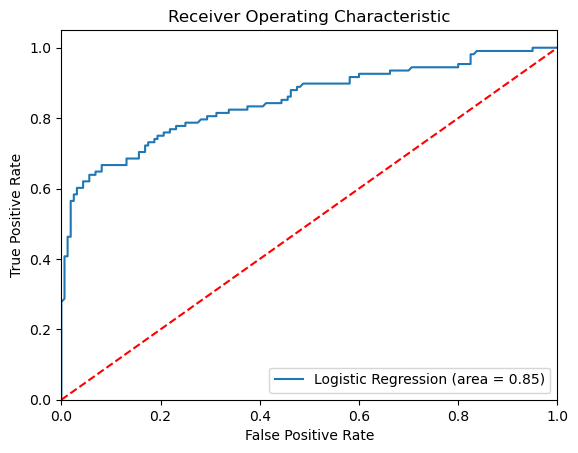

In [81]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_score = lr.predict_proba(x_test) [:,1]

logit_roc_auc= roc_auc_score(y_test,y_score)
fpr, tpr, thresholds = roc_curve (y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()